In [1]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, brier_score_loss
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

import sys
sys.path.append('../')

from src.feature_engineering import FeatureGenerator

In [2]:
# feat_gen = FeatureGenerator()
# feat_gen()

In [2]:
train_df = pd.read_csv("../data/processed/train.csv").drop(columns=["BOUT_ID", "EVENT_ID", "DATE", "BOUT_ORDINAL"])
test_df = pd.read_csv("../data/processed/test.csv").drop(columns=["BOUT_ID", "EVENT_ID", "DATE", "BOUT_ORDINAL"])

test_df = test_df.loc[test_df["RED_WIN"].notnull()]

In [3]:
X_train = train_df.drop(columns=["RED_WIN"])
y_train = train_df["RED_WIN"]
X_test = test_df.drop(columns=["RED_WIN"])
y_test = test_df["RED_WIN"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegressionCV(cv=5, max_iter=300, n_jobs=-1, random_state=0)
clf.fit(X_train_scaled, y_train)

y_pred_train_prob = clf.predict_proba(X_train_scaled)[:, 1]
log_loss(y_train, y_pred_train_prob), roc_auc_score(y_train, y_pred_train_prob)

(0.6262572996288011, 0.6910000065841165)

In [4]:
brier_score_loss(y_train, y_pred_train_prob)

0.2180509511092649

In [5]:
y_pred_train = clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.6538959358011908

In [6]:
y_pred_prob = clf.predict_proba(X_test_scaled)[:, 1]
log_loss(y_test, y_pred_prob), roc_auc_score(y_test, y_pred_prob)

(0.6141809857053622, 0.7040190456686463)

In [7]:
brier_score_loss(y_test, y_pred_prob)

0.21395740959007267

In [8]:
y_pred = clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.6487695749440716

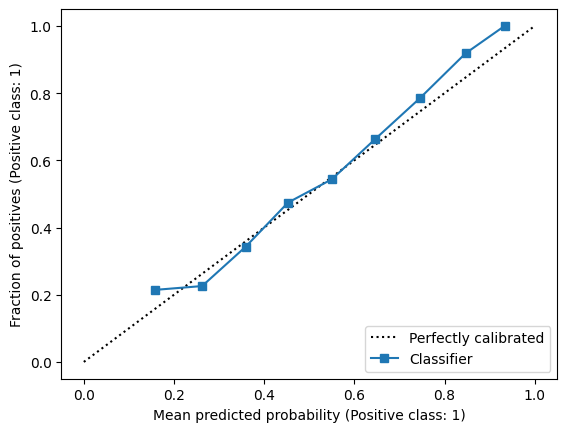

In [9]:
from sklearn.calibration import CalibrationDisplay

disp = CalibrationDisplay.from_predictions(y_test, y_pred_prob, n_bins=10)